In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.shape

(119390, 32)

In [8]:
# Checking null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Filling missing values with 0
df.fillna(0,inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [13]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [14]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [15]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [16]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH

## Exploratory Data Analysis

### 1. Percentage of Bookings by Country (Top 10)

In [17]:
# Calculating the percentage distribution of bookings by country
country_booking_distribution = df['country'].value_counts(normalize=True).nlargest(10) * 100

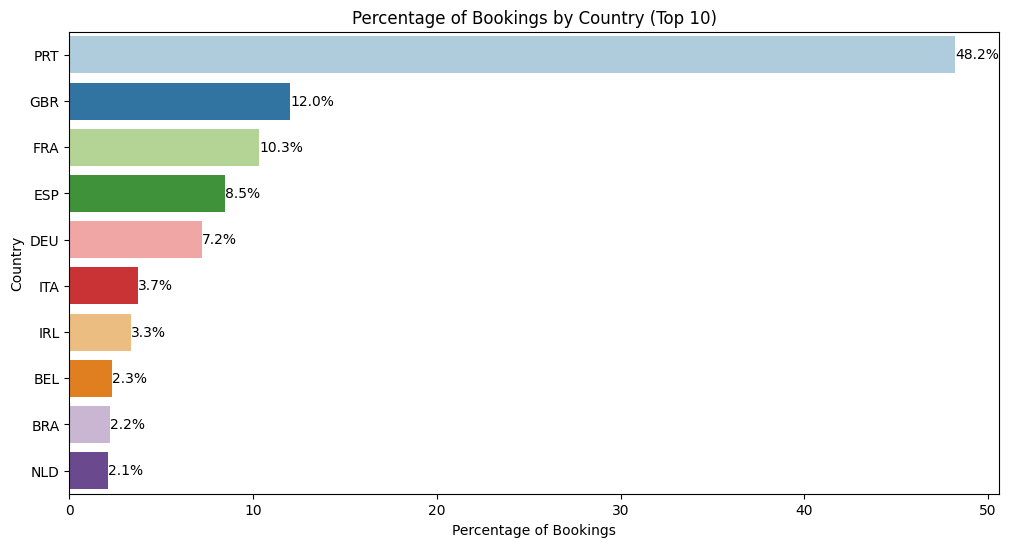

In [42]:
# Calculate percentages
total_bookings = country_booking_distribution.sum()
country_percentages = (country_booking_distribution / total_bookings) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=country_percentages.values, y=country_booking_distribution.index, palette="Paired")

# Add percentage labels to each bar
for index, value in enumerate(country_percentages):
    plt.text(value, index, f"{value:.1f}%", color="black", va="center")

plt.xlabel("Percentage of Bookings")
plt.ylabel("Country")
plt.title("Percentage of Bookings by Country (Top 10)")
plt.show()

### 2. Top 10 Countries with Maximum Cancellations (Percentage)

In [43]:
# Filtering the data for canceled bookings and selecting the top 10 countries with the most cancellations
top_canceled_countries = df[df['is_canceled'] == 1]['country'].value_counts().nlargest(10)

In [44]:
print(top_canceled_countries)

PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64


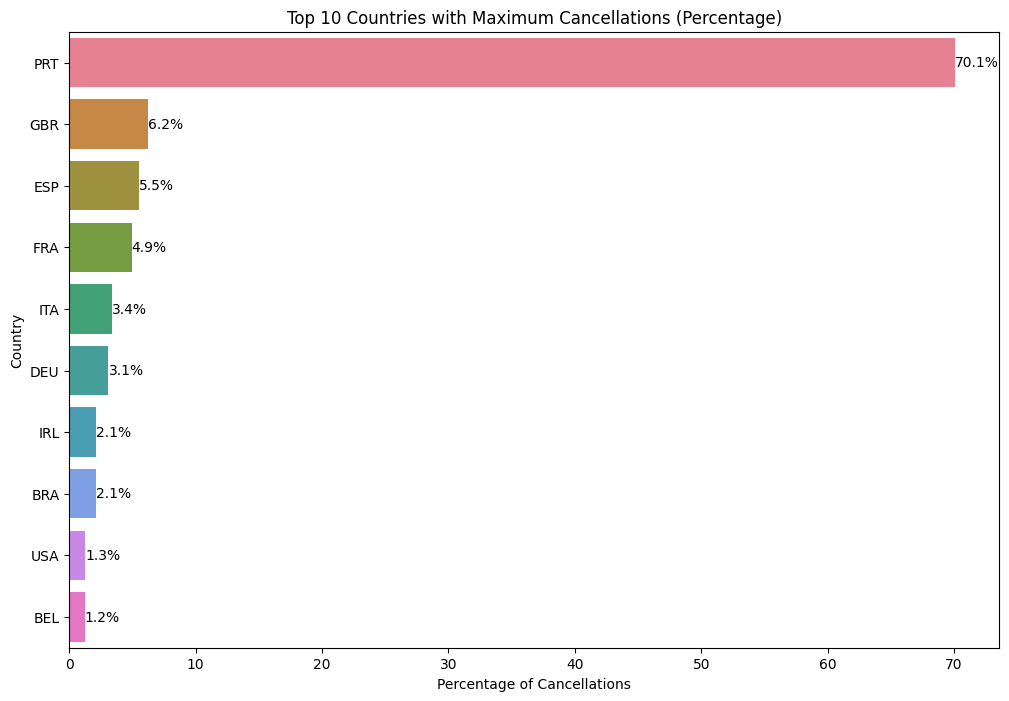

In [45]:
# Calculate percentage of cancellations for each country
total_cancellations = top_canceled_countries.sum()
top_canceled_percentages = (top_canceled_countries / total_cancellations) * 100

# Generate a color palette with different colors for each bar
colors = sns.color_palette("husl", len(top_canceled_percentages))

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_canceled_percentages.values, y=top_canceled_countries.index, palette=colors)

# Add percentage labels to each bar
for index, value in enumerate(top_canceled_percentages):
    plt.text(value, index, f"{value:.1f}%", color="black", va="center")

plt.title("Top 10 Countries with Maximum Cancellations (Percentage)")
plt.xlabel("Percentage of Cancellations")
plt.ylabel("Country")
plt.show()

- This bar chart shows the top 10 countries with the highest number of cancellations. This information can guide targeted marketing strategies, focusing on guests from these regions with tailored offers or flexible policies to reduce cancellations.

### 3. Average Room Price Per Night Over the Months for Each Hotel Type

In [46]:
# Calculating the average room price per night (ADR) over the months for each hotel type
monthly_adr_hotel = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

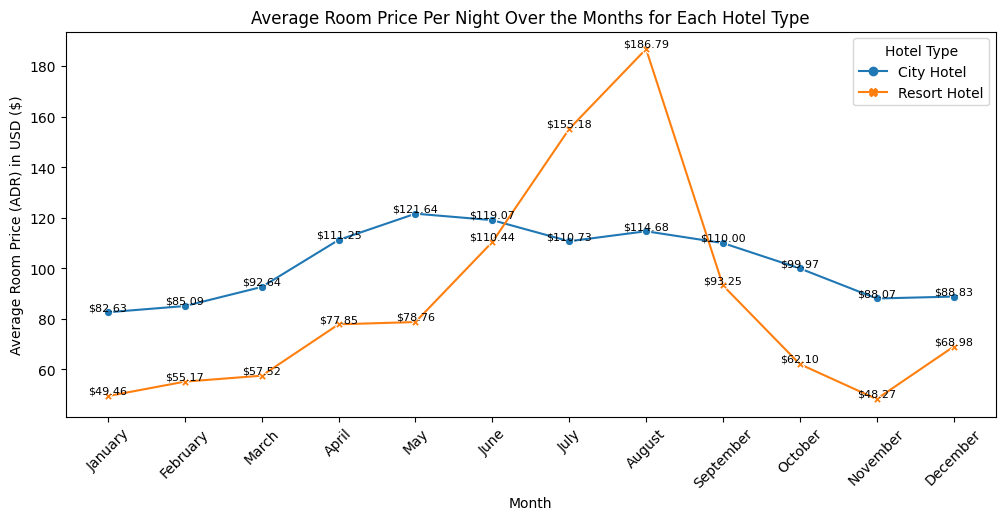

In [47]:
# Creating a line plot to show the average room price per night over the months for each hotel type
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_adr_hotel, markers=True, dashes=False)

# Adding price annotations for each marker
for hotel in monthly_adr_hotel.columns:
    for month, price in monthly_adr_hotel[hotel].items():
        plt.text(month, price, f"${price:.2f}", 
                 ha="center", va="bottom", fontsize=8, color="black")

plt.title("Average Room Price Per Night Over the Months for Each Hotel Type")
plt.xlabel("Month")
plt.ylabel("Average Room Price (ADR) in USD ($)")
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()

- This chart shows the average room price per night for each hotel type (Resort and City) across the months. It highlights any seasonal differences in pricing strategies between the two types of hotels, allowing for a comparative view of room rates throughout the year

### 4. Meal Preferences Among All Bookings

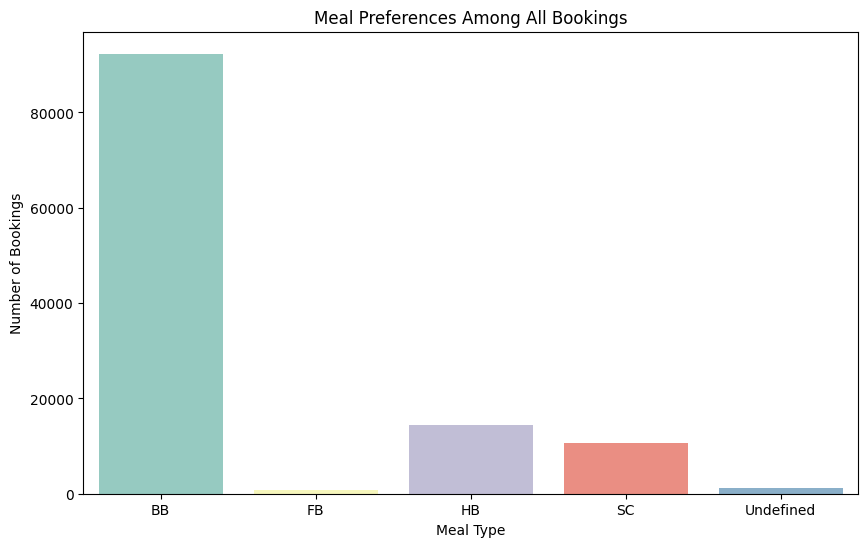

In [48]:
# Creating a count plot to show overall meal preferences among all bookings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='meal', palette="Set3")
plt.title("Meal Preferences Among All Bookings")
plt.xlabel("Meal Type")
plt.ylabel("Number of Bookings")
plt.show()

- This chart displays the overall meal preferences among all hotel bookings, giving insight into the most popular meal options chosen by guests. This information can guide meal planning and inventory decisions to meet guest demand effectively.

### 5. Distribution of Bookings by Market Segment

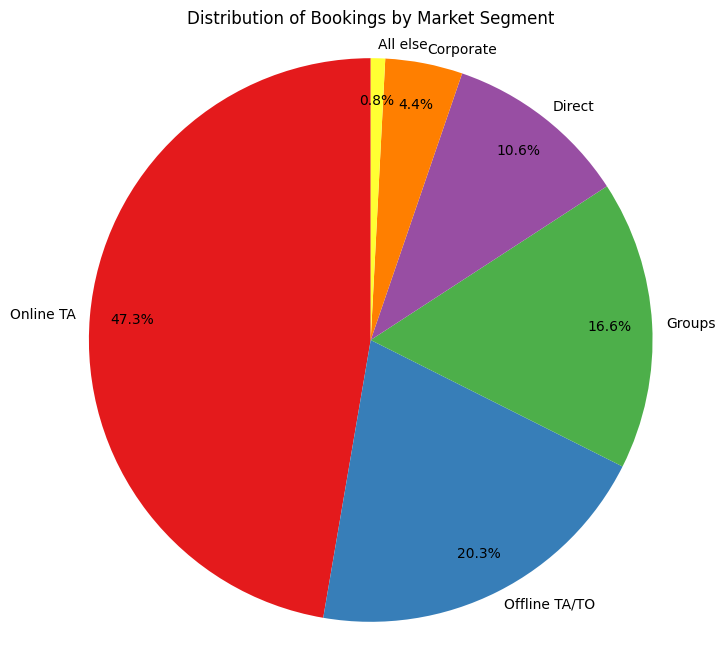

In [49]:
# Count the number of bookings by market segment
market_segment_counts = df['market_segment'].value_counts()

# Create 'All else' category
all_else_count = market_segment_counts[['Aviation', 'Complementary', 'Undefined']].sum()
filtered_counts = market_segment_counts.loc[['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate']]
filtered_counts['All else'] = all_else_count

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, 
        labels=filtered_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Set1", n_colors=len(filtered_counts)),
        pctdistance=0.85,  # Adjust percentage label distance
        labeldistance=1.05  # Adjust label distance
       )

# Equal aspect ratio ensures that pie chart is a circle.
plt.axis('equal')  

plt.title("Distribution of Bookings by Market Segment")
plt.show()

- This bar chart shows the distribution of bookings by market segment, illustrating the most common booking sources, such as online agents, offline agents, and direct bookings. This insight helps in understanding the dominant channels through which guests make bookings, allowing the hotel to tailor strategies for each segment.

### 6. Number of Bookings by Market Segment

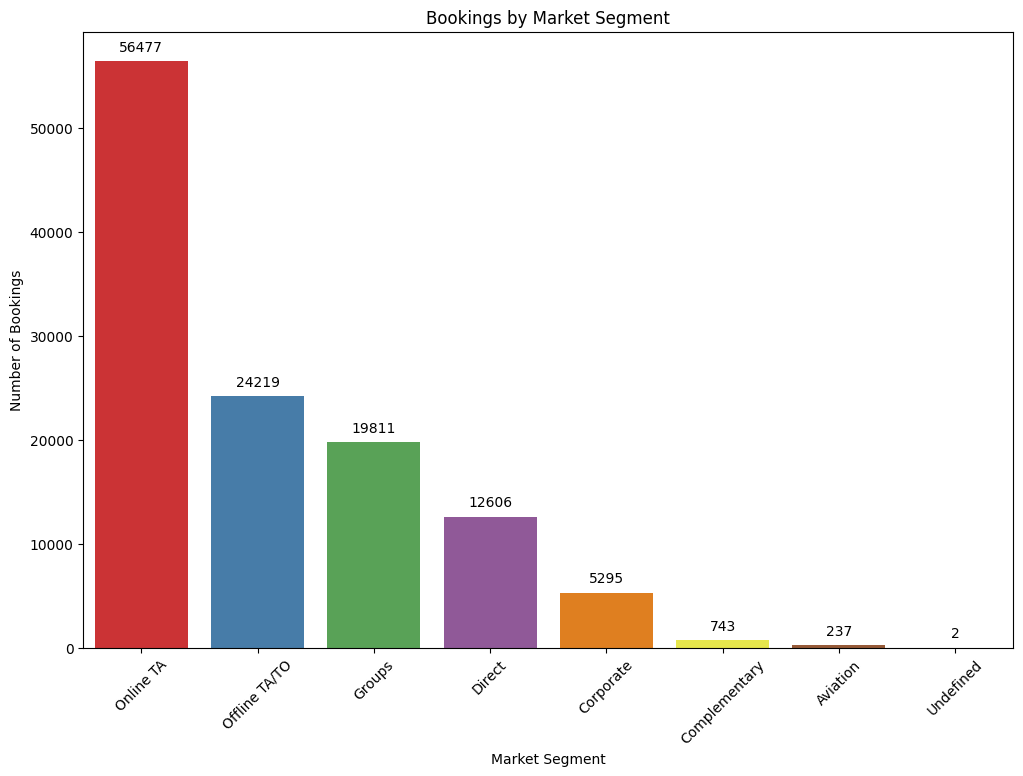

In [50]:
# Create the count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='market_segment', palette="Set1", order=df['market_segment'].value_counts().index)

# Add annotations for the number of bookings
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

### 7. Number of Cancellations by Month for Each Hotel Type

In [51]:
# Grouping data by month and hotel type to calculate the number of cancellations for each
cancellation_by_month_hotel = df[df['is_canceled'] == 1].groupby(
    ['arrival_date_month', 'hotel']).size().unstack().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

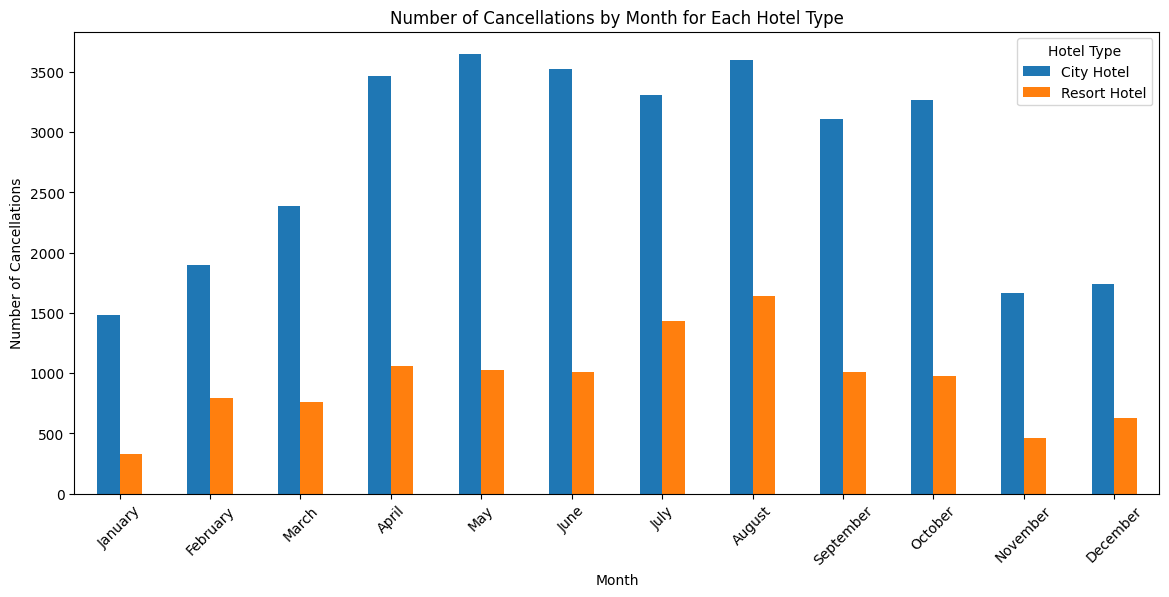

In [52]:
# Creating a bar plot to show the number of cancellations by month for each hotel type
cancellation_by_month_hotel.plot(kind='bar', figsize=(14, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Number of Cancellations by Month for Each Hotel Type")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.legend(title="Hotel Type", labels=["City Hotel", "Resort Hotel"])
plt.xticks(rotation=45)
plt.show()

### 8. Relationship Between Lead Time and Cancellation Status

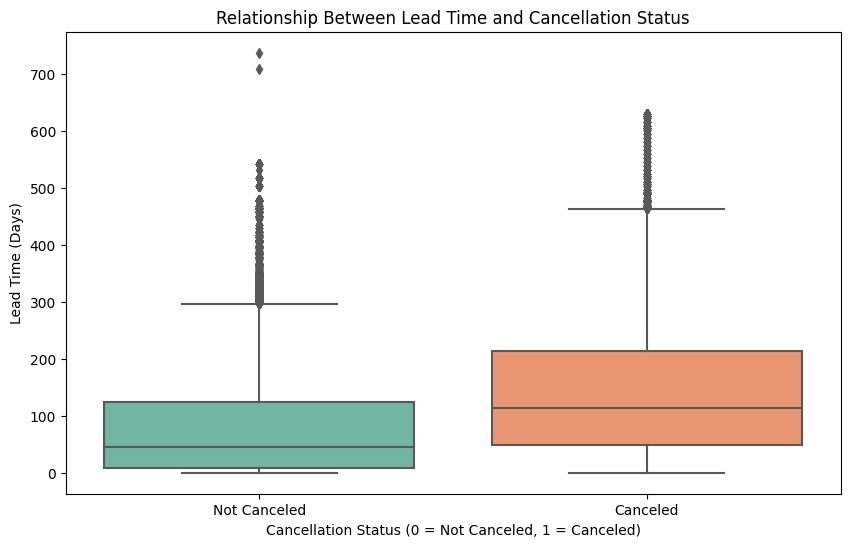

In [53]:
# Creating a box plot to visualize the relationship between lead time and cancellation status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time', palette="Set2")
plt.title("Relationship Between Lead Time and Cancellation Status")
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Lead Time (Days)")
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.show()

- This box plot shows the relationship between lead time and cancellation status. It indicates that bookings with a higher lead time (the time between booking and the actual stay) have a greater tendency to be canceled, as the median lead time for canceled bookings is significantly higher than for non-canceled bookings. This insight suggests that early bookings may require additional retention strategies to reduce the risk of cancellation

### 9. Number of Bookings by Month for Each Hotel Type

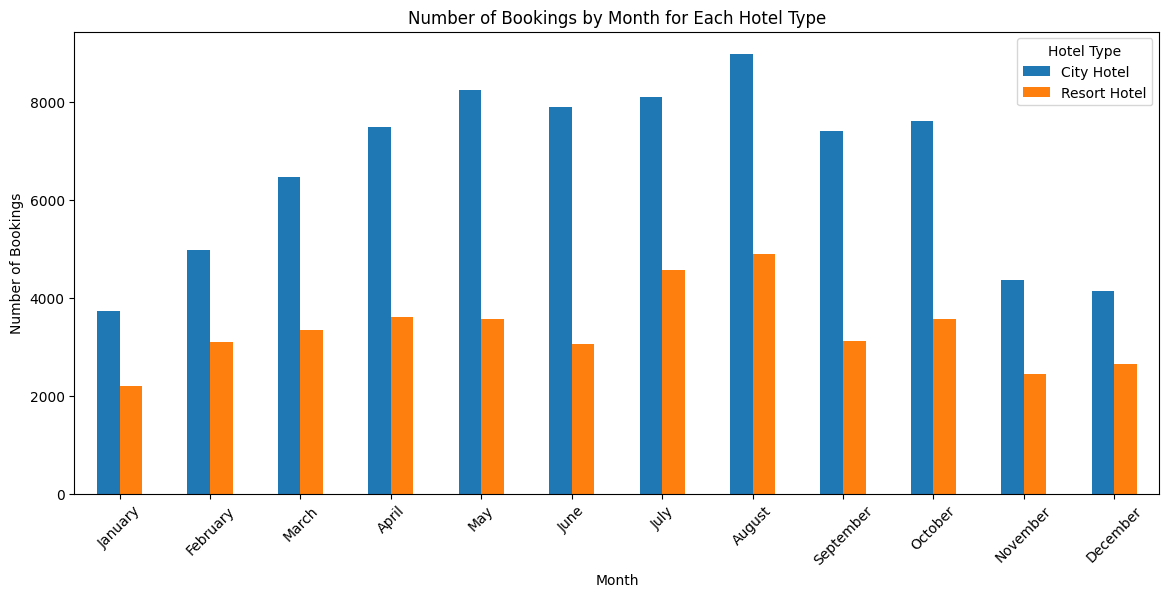

In [54]:
# Grouping data by month and hotel type to calculate the number of bookings for each
booking_by_month_hotel = df.groupby(['arrival_date_month', 'hotel']).size().unstack().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

# Creating a bar plot to show the number of bookings by month for each hotel type
booking_by_month_hotel.plot(kind='bar', figsize=(14, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Number of Bookings by Month for Each Hotel Type")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Hotel Type", labels=["City Hotel", "Resort Hotel"])
plt.xticks(rotation=45)
plt.show()

- This bar chart displays the number of bookings each month for both City Hotels and Resort Hotels. It reveals the booking trends across the year, allowing you to compare peak and off-peak booking periods for each hotel type. This visualization can be helpful for planning resource allocation, promotions, and pricing strategies based on seasonal demand patterns.

## Modelling Part

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [20]:
# Defining Target and initial features
target = 'is_canceled'
features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'country',
    'market_segment', 'distribution_channel', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'deposit_type', 'agent', 'company',
    'days_in_waiting_list', 'customer_type', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests'
]

In [21]:
# Finding the correlation matrix
corr_matrix = df.corr()

C:\Users\aadit\AppData\Local\Temp\ipykernel_28100\2917329483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


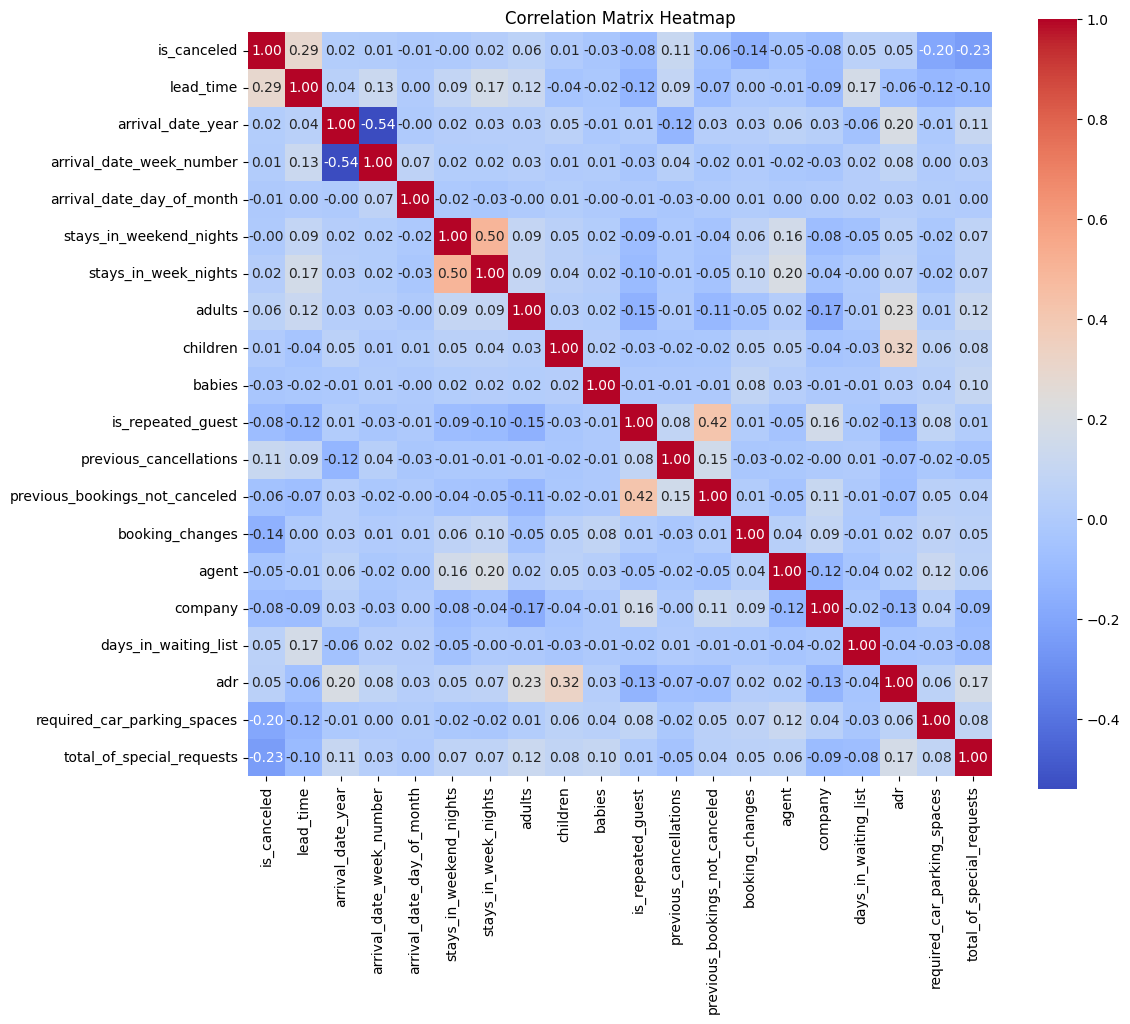

In [22]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
# Select positive correlation features for training
positive_corr_features = corr_matrix['is_canceled'][corr_matrix['is_canceled'] > 0].index.tolist()
positive_corr_features.remove('is_canceled')

In [24]:
# Select top negatively correlated features for training
negative_corr_features = corr_matrix['is_canceled'][corr_matrix['is_canceled'] < 0].sort_values()
important_negative_features = negative_corr_features.index[:5].tolist()

In [25]:
# Combine positive and important negative features for training
combined_features = positive_corr_features + important_negative_features

# Split the data
X_combined = df[combined_features]
y = df[target]

In [26]:
# Defining numerical and categorical features
refined_num_features = [col for col in combined_features if col in positive_corr_features]
refined_cat_features = [col for col in combined_features if col not in refined_num_features]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

### Preprocessing before training

In [28]:
# Impute numerical features with the median
num_imputer = SimpleImputer(strategy='median')
X_train[refined_num_features] = num_imputer.fit_transform(X_train[refined_num_features])
X_test[refined_num_features] = num_imputer.transform(X_test[refined_num_features])

In [29]:
# Impute categorical features with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[refined_cat_features] = cat_imputer.fit_transform(X_train[refined_cat_features])
X_test[refined_cat_features] = cat_imputer.transform(X_test[refined_cat_features])

In [30]:
# Scalling Numerical Features
scaler = StandardScaler()
X_train[refined_num_features] = scaler.fit_transform(X_train[refined_num_features])
X_test[refined_num_features] = scaler.transform(X_test[refined_num_features])

In [31]:
# Encoding Categorical Features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[refined_cat_features])
X_test_encoded = encoder.transform(X_test[refined_cat_features])

In [32]:
# Converting the encoded features to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(refined_cat_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(refined_cat_features))

In [33]:
# Concatenate the encoded features with the rest of the training and testing data
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train.drop(columns=refined_cat_features), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=refined_cat_features), X_test_encoded_df], axis=1)

In [34]:
# Model Training with liblinear solver
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

## Model Evaluation

In [35]:
# Evaluate the model
test_score = model.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.2%}")

Test Accuracy: 74.58%


In [36]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Predictions and probabilities
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print("Corrected Classification Report:")
print(classification_report(y_test, y_pred))

Corrected Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     14907
           1       0.71      0.55      0.62      8971

    accuracy                           0.75     23878
   macro avg       0.74      0.71      0.71     23878
weighted avg       0.74      0.75      0.74     23878



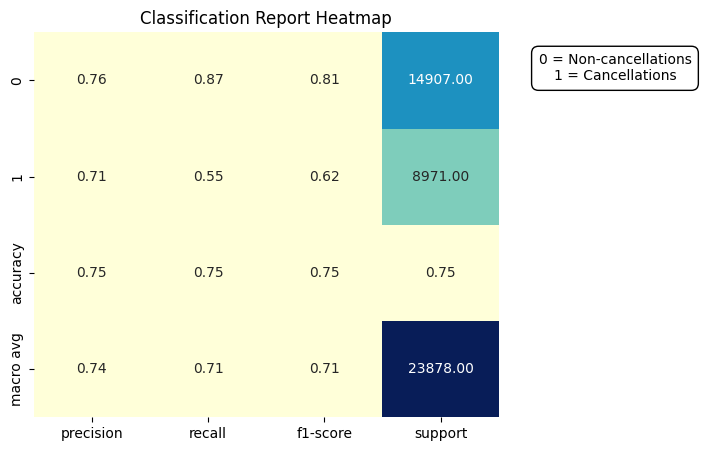

In [37]:
# Visualizing the classification report

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']].iloc[:-1, :], annot=True, cmap="YlGnBu", fmt=".2f", cbar = False)
plt.title("Classification Report Heatmap")
plt.text(5, 0.5, "0 = Non-cancellations\n1 = Cancellations", 
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"), 
         ha="center", fontsize=10)

plt.show()

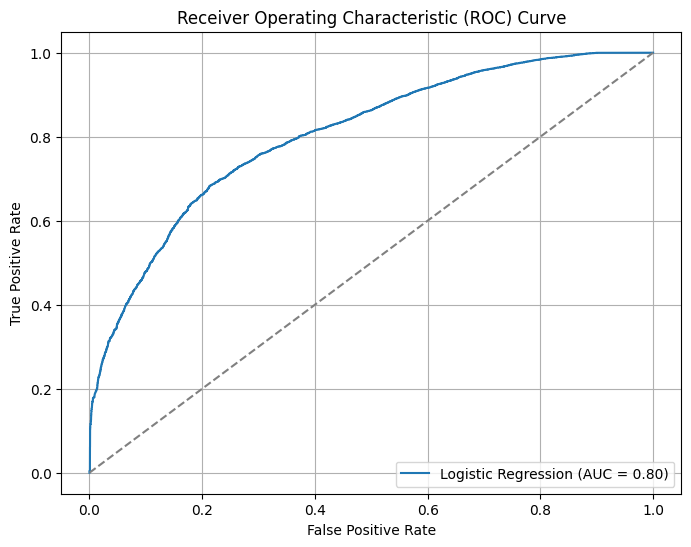

In [38]:
# Plotting AUC-ROC score and curve
corrected_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {corrected_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Model Evaluation:
Classification Report:

Precision:
- Class 0 (Non-Canceled): 76%
- Class 1 (Canceled): 83%

Recall:
- Class 0: 94% (high recall for non-cancelled bookings).
- Class 1: 51% (lower recall for cancellations).
- F1-Score: Averages around 63% for cancellations.

AUC-ROC:

- The AUC score is 0.80, indicating good model discrimination between canceled and non-canceled bookings.

Insights:
- Strengths: High precision and recall for non-cancellations.
- Weaknesses: Lower recall for cancellations, meaning some cancellations are still missed.

### Most influential features in prediction

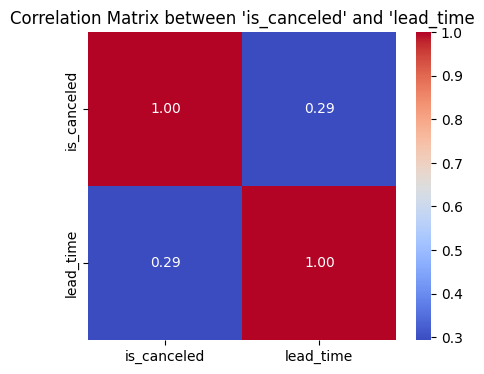

In [39]:
correlation = df[['is_canceled', 'lead_time']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix between 'is_canceled' and 'lead_time")
plt.show()

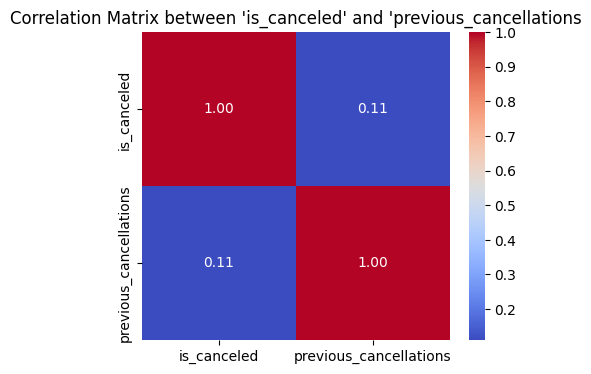

In [40]:
correlation = df[['is_canceled', 'previous_cancellations']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix between 'is_canceled' and 'previous_cancellations")
plt.show()